Filters
=======
The [ktk.filters](api/ktk.filters.rst) module wraps some filters to use directly with ktk's TimeSeries objects. These filters are convenience wrappers for numpy's and scipy's filters.

In [1]:
import ktk.lab as ktk
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In this tutorial, we will see the effect of filtering on a TimeSeries that includes different forms of signal:

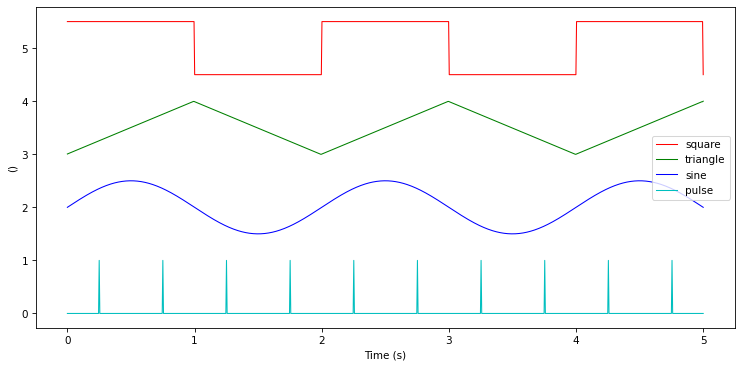

In [2]:
ts_source = ktk.TimeSeries(time=np.linspace(0, 5, 1000))

# Generate some fancy functions
ts_source.data['square'] = np.array([int(t) % 2 == 0 for t in ts_source.time]) + 4.5
ts_source.data['triangle'] = np.block([
    0.01 * (sp.integrate.cumtrapz(ts_source.data['square'] - 5)) + 3, 4.])
ts_source.data['sine'] = 0.5 * np.sin(ts_source.time * np.pi) + 2
ts_source.data['pulse'] = np.array([float((i + 50) % 100 == 0) for i in range(1000)])

ts_source.plot()
plt.tight_layout()

Let's add some noise in these nice functions.

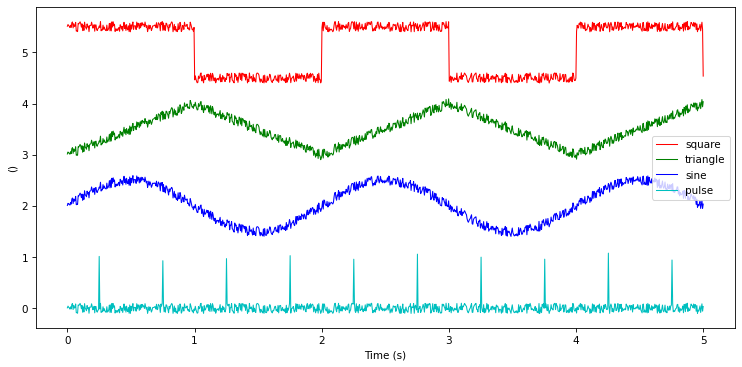

In [3]:
np.random.seed(0)
noise = (np.random.rand(1000) - 0.5) / 5
ts = ts_source.copy()
ts.data['square'] += noise
ts.data['triangle'] += noise
ts.data['sine'] += noise
ts.data['pulse'] += noise

ts.plot()
plt.tight_layout()

Filtering a TimeSeries using a Butterworth filter
-------------------------------------------------
The [ktk.filters.butter()](api/ktk.filters.rst#ktk.filters.butter) function method applies a butterworth filter on a TimeSeries, using `scipy.signal`'s functions.

Here is how to filter using a no-lag Butterworth filter of order 2 at different cut-off frequencies:

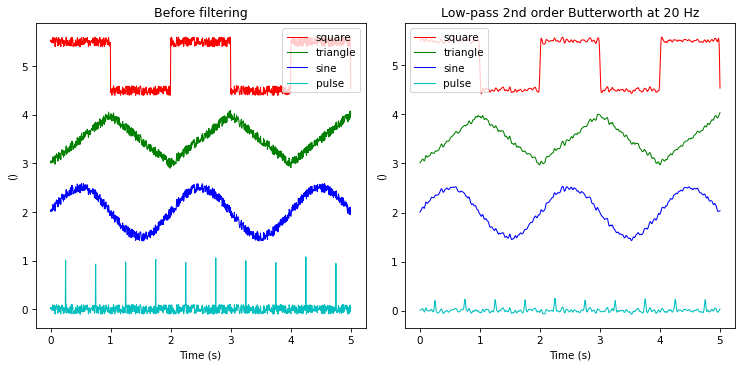

In [4]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.butter(ts, 20)
temp.plot()
plt.title('Low-pass 2nd order Butterworth at 20 Hz')
plt.tight_layout()

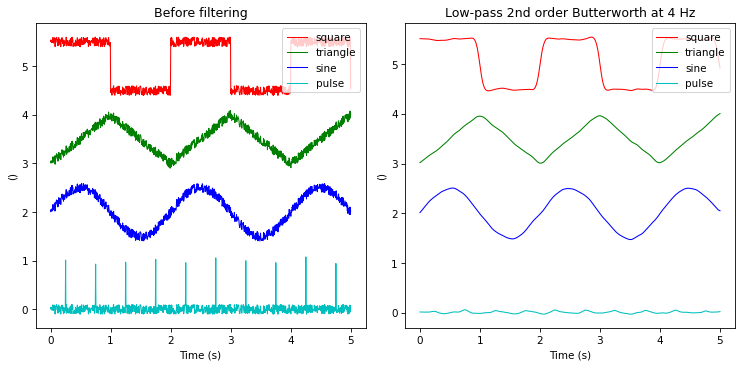

In [5]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.butter(ts, 4)  # 4 Hz
temp.plot()
plt.title('Low-pass 2nd order Butterworth at 4 Hz')
plt.tight_layout()

Smoothing a TimeSeries with a moving average
--------------------------------------------

The [ktk.filters.smooth()](api/ktk.filters.rst#ktk.filters.smooth) function applies a moving average on TimeSeries data.

Here is how to smooth a signal using a moving average filter using different window lengths.

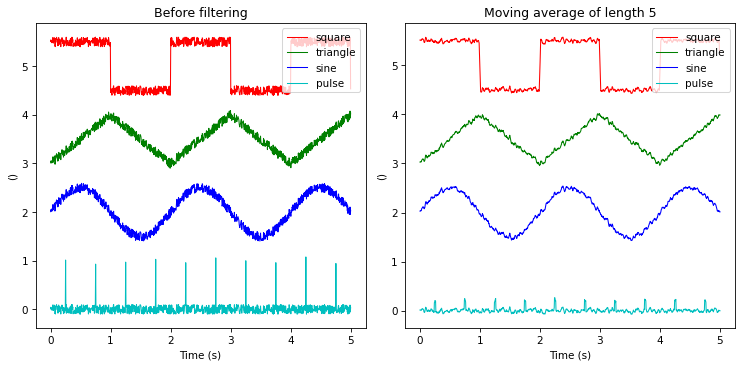

In [6]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.smooth(ts, window_length=5)
temp.plot()
plt.title('Moving average of length 5')
plt.tight_layout()

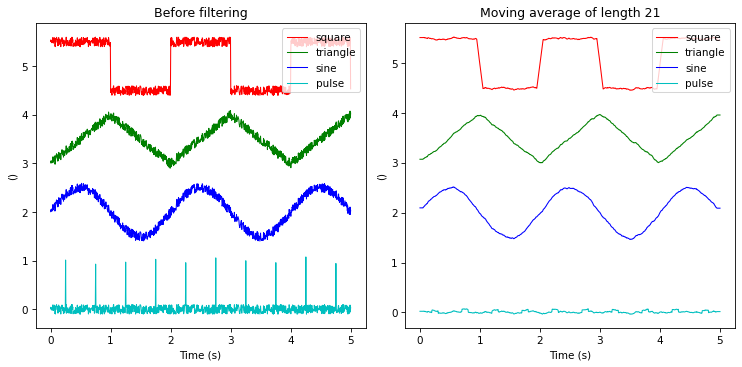

In [7]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.smooth(ts, window_length=21)
temp.plot()
plt.title('Moving average of length 21')
plt.tight_layout()

Smoothing a TimeSeries using a Savitzky-Golay filter
------------------------------------------------------------------
The [ktk.filters.savgol()](api/ktk.filters.rst#ktk.filters.savgol) function applies the `scipy.signal.savgol_filter` filter to a TimeSeries. This is an extension of the moving average using a polynom of higher degrees than 0.

Here is how to smooth a signal using a Savitsky-Golay filter of order 2 using different window lengths.

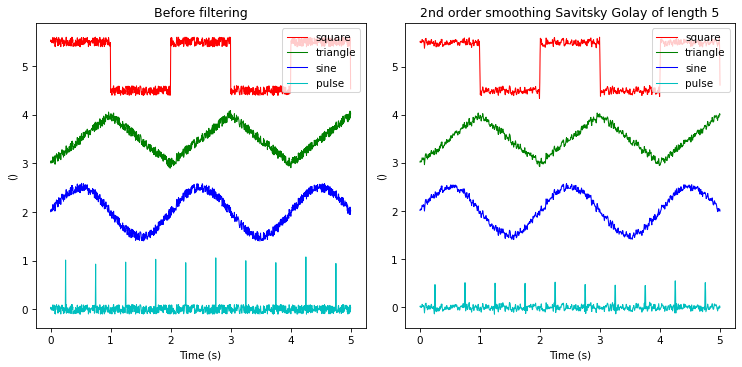

In [8]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.savgol(ts, window_length=5, poly_order=2)
temp.plot()
plt.title('2nd order smoothing Savitsky Golay of length 5')
plt.tight_layout()

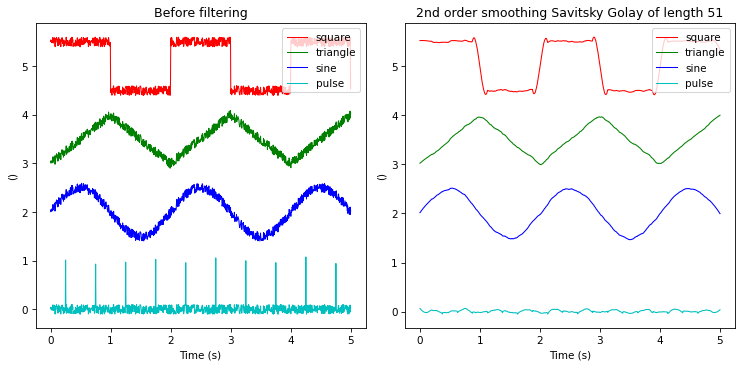

In [9]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.savgol(ts, window_length=51, poly_order=2)
temp.plot()
plt.title('2nd order smoothing Savitsky Golay of length 51')
plt.tight_layout()

Removing artefacts using a median filter
---------------------------------------

The [ktk.filters.median()](api/ktk.filters.rst#ktk.filters.median) function filters a TimeSeries using a median filter. This type of filter is pretty powerful for removing artefacts that rarely happen twice in a row. Here is how to use this filter with a window length of 3.

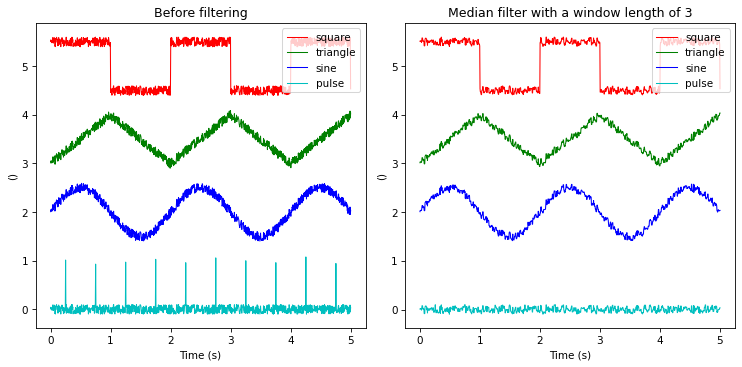

In [10]:
plt.subplot(1, 2, 1)
ts.plot()
plt.title('Before filtering')

plt.subplot(1, 2, 2)
temp = ktk.filters.median(ts, window_length=3)
temp.plot()
plt.title('Median filter with a window length of 3')
plt.tight_layout()

Derivating using a differential filter
--------------------------------------

The [ktk.filters.deriv()](api/ktk.filters.rst#ktk.filters.deriv) function derivates a signal in time using the centered difference formula. Since the derivative is calculated between the original data points, the resulting TimeSeries has a modified time vector that is also between the original time points.

Here is how to use this function to obtain the first derivative of a signal without preliminary filtering.

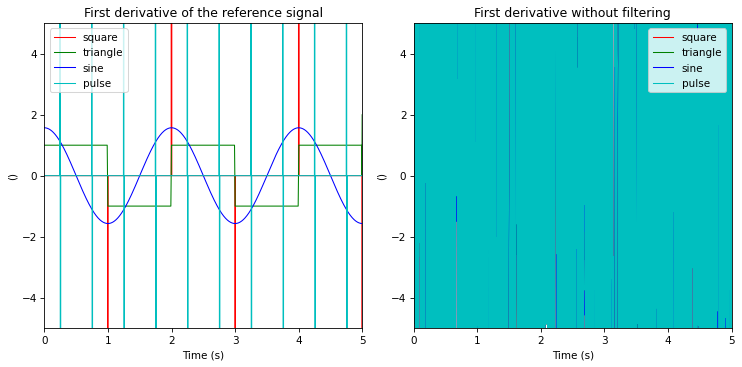

In [11]:
plt.subplot(1, 2, 1)
temp = ktk.filters.deriv(ts_source)
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative of the reference signal')

plt.subplot(1, 2, 2)
temp = ktk.filters.deriv(ts)
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative without filtering')

plt.tight_layout()

Obviously there is a lot of noise in this signal, which gets it very difficult to derivate.

Here is the same after filtering the data using Butterworth filters of different cut-off frequencies prior to derivating.

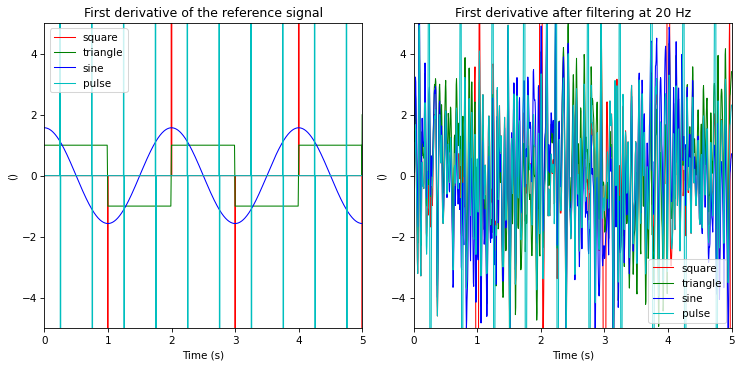

In [12]:
plt.subplot(1, 2, 1)
temp = ktk.filters.deriv(ts_source)
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative of the reference signal')

plt.subplot(1, 2, 2)
temp = ktk.filters.deriv(
    ktk.filters.butter(ts, fc=20))
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative after filtering at 20 Hz')

plt.tight_layout()

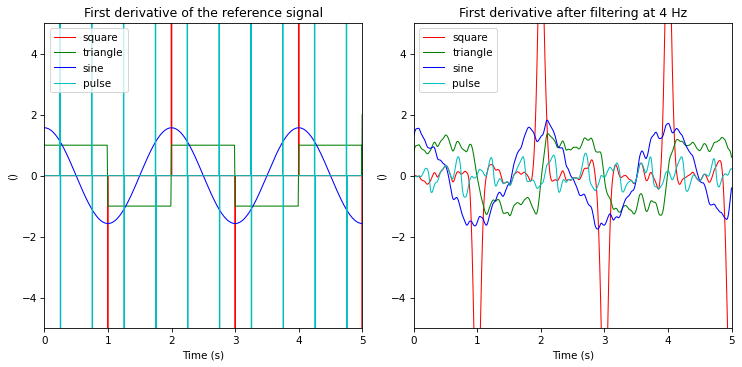

In [13]:
plt.subplot(1, 2, 1)
temp = ktk.filters.deriv(ts_source)
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative of the reference signal')

plt.subplot(1, 2, 2)
temp = ktk.filters.deriv(
    ktk.filters.butter(ts, fc=4))
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative after filtering at 4 Hz')

plt.tight_layout()

Derivating using a Savitsky-Golay filter
----------------------------------------
The [ktk.filters.savgol()](api/ktk.filters.rst#ktk.filters.savgol) can smooth but also derivate with a very good performance. Here is how to derivate a signal using this type of filter.

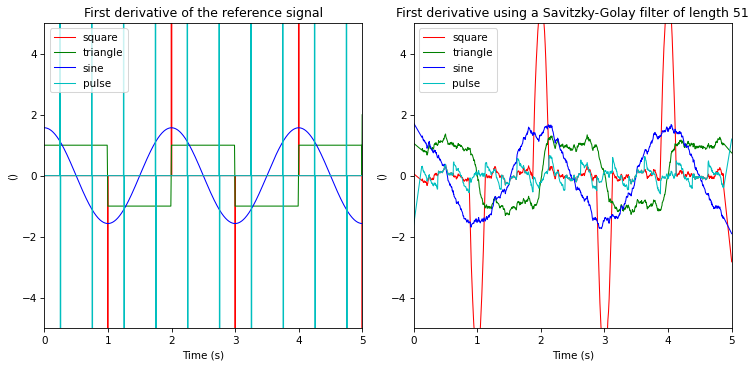

In [14]:
plt.subplot(1, 2, 1)
temp = ktk.filters.deriv(ts_source)
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative of the reference signal')

plt.subplot(1, 2, 2)
temp = ktk.filters.savgol(ts, window_length=51, poly_order=2, deriv=1)
temp.plot()
plt.axis([0, 5, -5, 5])
plt.title('First derivative using a Savitzky-Golay filter of length 51')

plt.tight_layout()

For more information, please check the [API Reference for the filters module](api/ktk.filters.rst).